# Homework 2

In [1126]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1

### Point a)

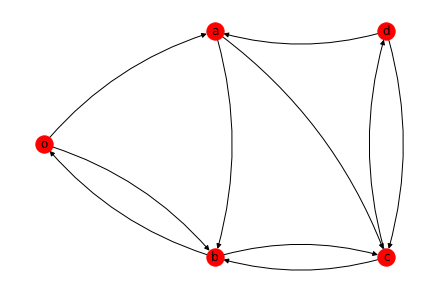

In [1127]:
# construct transition rate matrix
Lambda = np.array([
    [0,2/5,1/5,0,0],
    [0,0,3/4,1/4,0],
    [1/2,0,0,1/2,0],
    [0,0,1/3,0,2/3],
    [0,1/3,0,1/3,0]
    ])

# generate graph from transition rate matrix
G = nx.from_numpy_matrix(Lambda,create_using=nx.DiGraph)
# relabel nodes
G = nx.relabel_nodes(G,{0:'o',1:'a',2:'b',3:'c',4:'d'})
# define plot positions
pos = {'o':[0,1],'a':[1,2],'b':[1,0],'d':[2,2],'c':[2,0]}
# extract node list
nodes = list(G.nodes)

# plot graph
nx.draw(G,pos,with_labels=True,node_color='red',connectionstyle="arc3,rad=-0.15")
#nx.draw_networkx_edge_labels(G,pos,nx.get_edge_attributes(G,'weight'),font_color='red')
plt.savefig('Ex1.svg',dpi=180)

In [1128]:
# compute normalized weight matrix 
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# simulate n_iter random walks over the graph
n_iter = 10000

# return time for node a 
reaching_times = []

for i in range(n_iter):
    pos = []

    # start from node a
    first_pos = 1
    pos.append(1)

    transition_times = []
    transition_times.append(0)

    t_next = -np.log(np.random.rand())/w[1]

    while True:
        pos.append(np.random.choice(len(w), p=P[pos[-1],:]))
        transition_times.append(transition_times[-1] + t_next)
        t_next = -np.log(np.random.rand())/w[pos[-1]]
        # stop when node a is again reached
        if pos[-1] == first_pos:
            break

    reaching_times.append(transition_times[-1])

print('Average time:', np.average(reaching_times))
print('Standard deviation:', np.std(reaching_times))
    

Average time: 6.796258643093976
Standard deviation: 5.076927716012004


### Point b)

Computation of the theoretical return times for node *a*.

In [1129]:
w_star = np.max(w)
# compute the off-diagonal part of Q
Q = Lambda/w_star
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

# compute eigenvalues, eigenvectors and find the dominant eigenvector
values, vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)

# compute the stationary distribution
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)

In [1130]:
th_ret_time = 1/(w*pi_bar)

In [1131]:
print('Theoretical return time of node a:',th_ret_time[1])

Theoretical return time of node a: 6.750000000000008


### Point c)

In [1134]:
# simulate n_iter random walks over the graph
n_iter = 1000

# hitting time for node d from node o
reaching_times = []

for i in range(n_iter):
    pos = []
    
    # start from node o
    first_pos = 0
    pos.append(0)

    destination_pos = 4

    transition_times = []
    transition_times.append(0)

    t_next = -np.log(np.random.rand())/w[0]

    while True:
        pos.append(np.random.choice(len(w), p=P[pos[-1],:]))
        transition_times.append(transition_times[-1] + t_next)
        t_next = -np.log(np.random.rand())/w[pos[-1]]
        # stop when node d is reached
        if pos[-1] == destination_pos:
            break

    reaching_times.append(transition_times[-1])

print('Average time:', np.average(reaching_times))
print('Standard deviation:', np.std(reaching_times))
    

Average time: 8.448691931649485
Standard deviation: 6.40378708976182


### Point d)

In [1135]:
# define S and R
S = [4]
R = [node for node in range(G.number_of_nodes()) if node not in S]

# compute P matrix excluding d node
hatP = P[np.ix_(R,R)]

# compute hitting times for node d
hatx = np.linalg.solve((np.identity(G.number_of_nodes()-1)-hatP),np.ones(G.number_of_nodes()-1)/w[:4])

In [1136]:
print('Theoretical hitting time to d from o:',hatx[0])

Theoretical hitting time to d from o: 8.785714285714285


### Point e)

In [1137]:
# compute the normalized weight matrix
degrees = np.sum(Lambda,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda

In [1138]:
# choose an arbitrary initial condition
x0 = [2.5,6,3,7.2,9.8]

In [1139]:
# perform the French-DeGroot dynamics
for i in range(100): 
    x0 = P @ x0

In [1140]:
print('Alpha:',x0[0])

Alpha: 5.734782608695511


In [1142]:
# compute the invatiant distribution
w, v = np.linalg.eig(P.T)
index = np.argmax(w.real)

pi = v[:,index].real
pi = pi/np.sum(pi)

In [1143]:
print('Alpha:',pi.T @ x0)

Alpha: 5.73478260869564


Consensus is guaranteed because G is strongly connected

### Point f)

In [1144]:
# generate the input vector composed by 5 r.v with uniform distribution between 0 and 10
x0 = 10*np.random.rand(5)

# compute the variance of each r.v composing x_0
sigma2 = 10**2/12

In [1145]:
print('Variance of each component of input vector:',sigma2)

Variance of each component of input vector: 8.333333333333334


In [1146]:
# perform the French-DeGroot dynamics n_iter times
n_iter = 50
cons = []

for i in range(n_iter):
    x0 = 10*np.random.rand(5)
    for ii in range(100):
        x0 = P @ x0
    cons.append(x0[0])
    

In [1147]:
# compute the variance of the consensus according to simulations
print('Simulated varience of consensus:',np.var(cons))

Simulated varience of consensus: 1.6805581250528059


In [1148]:
# compute the variance of the consensus theoretically
print('Theoretical variance of consensus:',np.sum(pi**2)*sigma2)

Theoretical variance of consensus: 1.7800882167611847


### Point g)

In [1149]:
# generate new graph
G_G = nx.DiGraph(G)

# remove (d,a) and (d,c) edges
G_G.remove_edges_from([('d','a'),('d','c')])


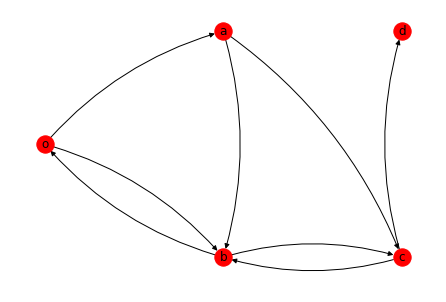

In [1150]:
pos = {'o':[0,1],'a':[1,2],'b':[1,0],'d':[2,2],'c':[2,0]}

nx.draw(G_G,pos,with_labels=True,node_color='red',connectionstyle="arc3,rad=-0.15")

plt.savefig('Ex1_g.svg',dpi=180)

In [1151]:
# add self loop to d
G_G.add_edge('d','d')

# compute normalized adjacency matrix
W = nx.adjacency_matrix(G_G) # modify lambda
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# compute invariant distribution
w, v = np.linalg.eig(P.T)
index = np.argmax(w.real)
pi = v[:,index].real
pi = pi/np.sum(pi)

/tmp/ipykernel_166728/818650536.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G_G) # modify lambda


In [1152]:
# perform the French-DeGroot dynamics
x0 = 10*np.random.rand(5)
for i in range(100):
    x0 = P @ x0

print('Opinions after 100 iterations:',x0)

Opinions after 100 iterations: [5.63048531 5.63048531 5.63048531 5.63048532 5.63048532]


In [1153]:
# perform the French-DeGroot dynamics n_iter times
n_iter = 50
cons = []

for i in range(n_iter):
    x0 = 10*np.random.rand(5)
    for ii in range(100):
        x0 = P @ x0
    cons.append(x0[0])

In [1154]:
# compute the variance of the consensus according to simulations
print('Simulated varience of consensus:',np.var(cons))

Simulated varience of consensus: 8.513293214726684


In [1155]:
# compute the variance of the consensus theoretically
print('Theoretical varience of consensus:',sigma2)

Theoretical varience of consensus: 8.333333333333334


### Point h)

In [1156]:
# generate new graph
G_H = nx.DiGraph(G)

# remove edges (c,b) and (d,a)
G_H.remove_edges_from([('c','b'),('d','a')])

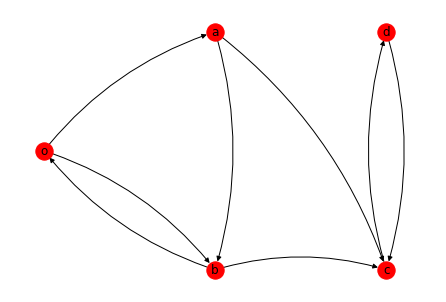

In [1157]:
pos = {'o':[0,1],'a':[1,2],'b':[1,0],'d':[2,2],'c':[2,0]}

nx.draw(G_H,pos,with_labels=True,node_color='red',connectionstyle="arc3,rad=-0.15")

plt.savefig('Ex1_h.svg',dpi=180)

In [1158]:
# compute normalized adjacency matrix
W = nx.adjacency_matrix(G_H)
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

/tmp/ipykernel_166728/1568464766.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G_H)


In [1159]:
# perform the French-DeGroot dynamics
states = []
x0 = 10*np.random.rand(5)
for i in range(50):
    x0 = P @ x0
    states.append(x0.copy())


In [1160]:
nodes = ['o','a','b','c','d']
nodes_evolution = dict(zip(nodes,np.array(states).T))

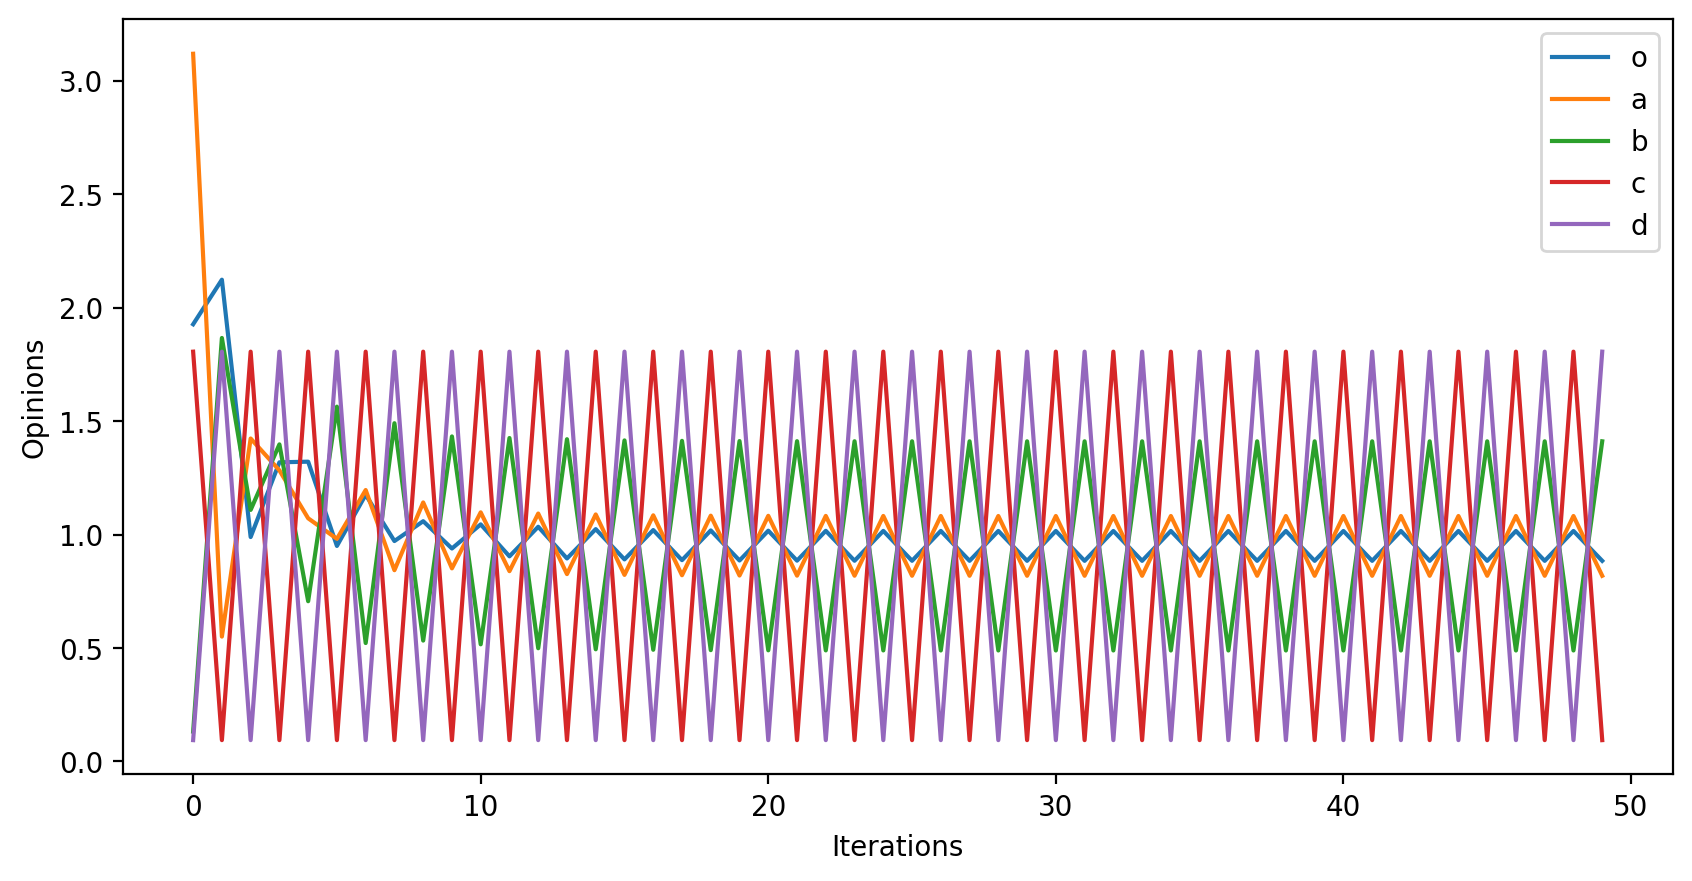

In [1161]:
plt.figure(dpi = 200, figsize=(10,5))
for l in nodes_evolution.keys():
    plt.plot(range(50), nodes_evolution[l], label = l)
plt.legend(prop=dict(size=10))
plt.xlabel("Iterations")
plt.ylabel("Opinions")
plt.savefig('Ex1_h2.svg',dpi=180)

## Problem 2

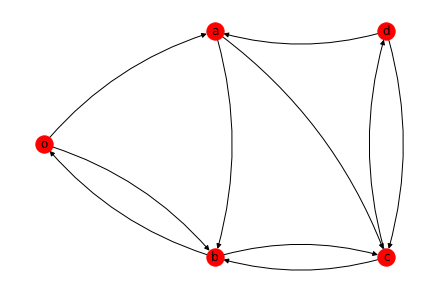

In [1162]:
nx.draw(G,pos,with_labels=True,node_color='red',connectionstyle="arc3,rad=-0.15")

Lambda = np.array([
    [0,2/5,1/5,0,0],
    [0,0,3/4,1/4,0],
    [1/2,0,0,1/2,0],
    [0,0,1/3,0,2/3],
    [0,1/3,0,1/3,0]
    ])

w = np.sum(Lambda,axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

### Particle perspective

In [1163]:
# return time for each particle
reaching_times = []

for i in range(100):
    # positions of the particle
    pos = []

    # start from node a
    first_pos = 1
    pos.append(first_pos)

    # set to 0 time of the first state
    transition_times = []
    transition_times.append(0)

    while True:
        # choose the new position according to the normalized weight matrix
        pos.append(np.random.choice(len(w), p=P[pos[-1],:]))
        # register current time
        transition_times.append(transition_times[-1] + t_next)
        # compute time between 2 ticks time of the poisson clock
        t_next = -np.log(np.random.rand())/w[pos[-1]]
        if pos[-1] == first_pos:
            break
    
    # register return time of the current particle
    reaching_times.append(transition_times[-1])

print('Average time:', np.average(reaching_times))

Average time: 7.154331970518665


### Node perspective


In [1164]:
# initial state
particles_per_node = [100,0,0,0,0]
# initial rates
rates = [particles_per_node[i]*w[i] for i in range(len(w))]

# all states in the simulation
states = []
# all times for each state in the simulation
times = []

# register inital state
states.append(particles_per_node.copy())

# register first time
current_time = 0
times.append(current_time)

while True:
    # register ticks of all poisson clocks
    transition_times = []
    for i in range(len(w)):
        transition_times.append(-np.log(np.random.rand())/rates[i])
    # select the node whose clock ticks first
    transition_node = np.argmin(transition_times)
    # register its time
    current_time += transition_times[transition_node]
    # end the simulation if time is up
    if current_time > 60:
        break
    # choose the new position according to the normalized weight matrix
    next_node = np.random.choice(len(w), p=P[transition_node,:])
    # move one particle between transition and next node
    particles_per_node[transition_node] -= 1
    particles_per_node[next_node] += 1
    # register new state and time
    states.append(particles_per_node.copy())
    times.append(current_time)
    # update rates
    rates = [particles_per_node[ii]*w[ii] for ii in range(len(w))]

/tmp/ipykernel_166728/2853438424.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  transition_times.append(-np.log(np.random.rand())/rates[i])


In [1165]:
print('Averange number of particles per node:', list(np.mean(np.array(states).T,axis=1)))

Averange number of particles per node: [21.114681547046374, 13.487204156243987, 22.649990379064846, 21.179719068693476, 21.568404848951317]


In [1166]:
nodes_evolution = dict(zip(nodes,np.array(states).T))

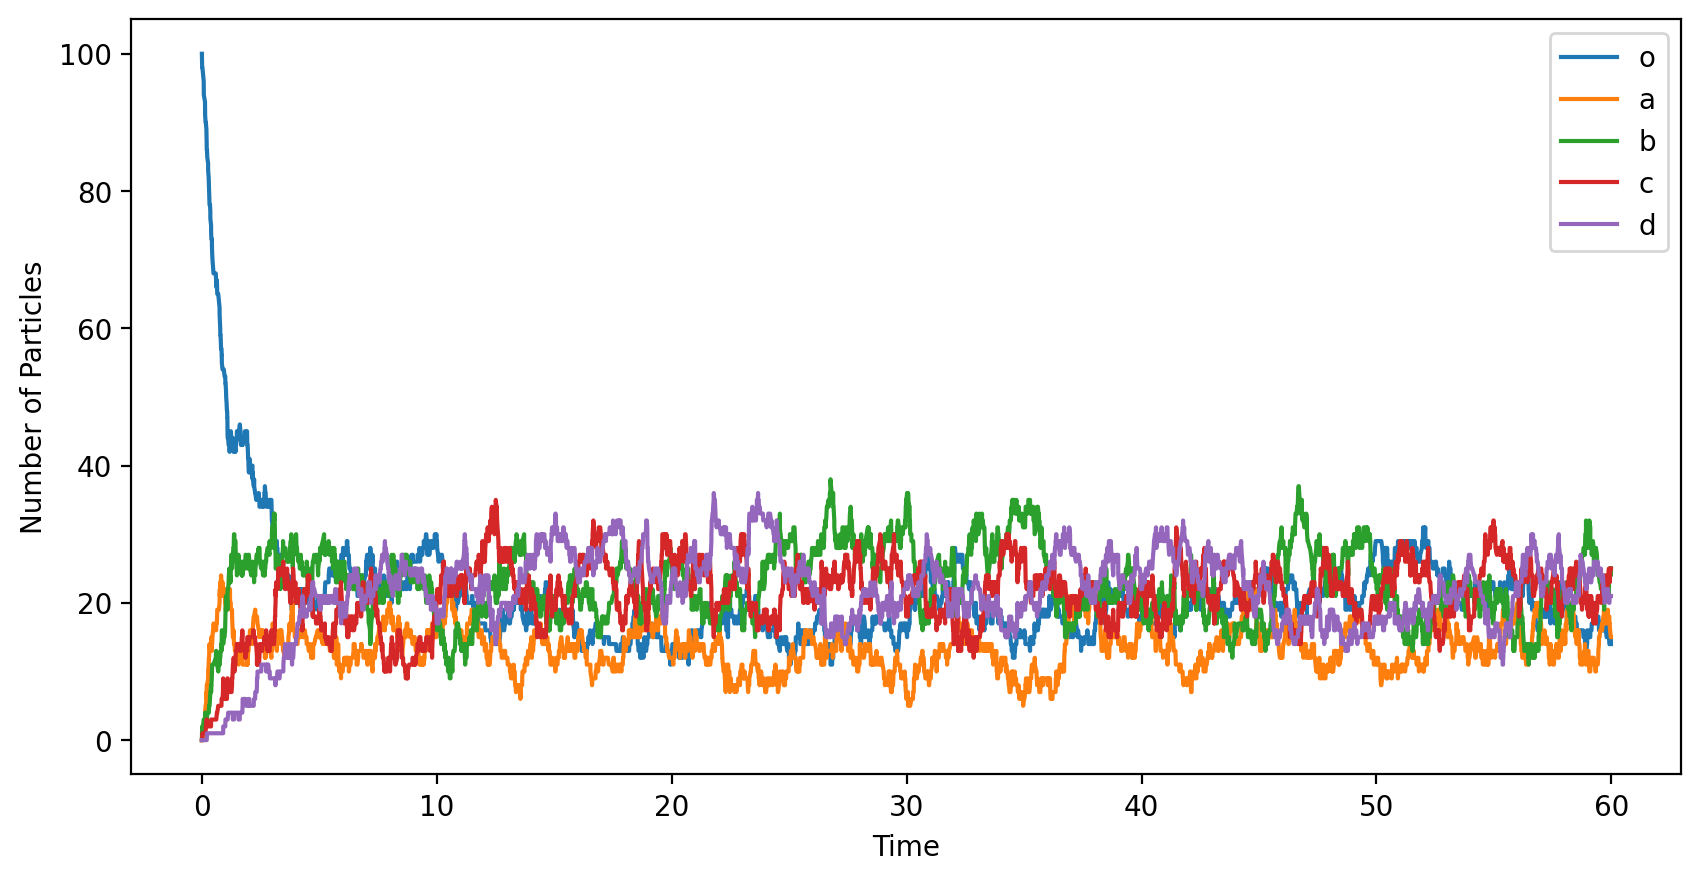

In [1167]:
plt.figure(dpi = 200, figsize=(10,5))
for l in nodes_evolution.keys():
    plt.plot(times, nodes_evolution[l], label = l)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.savefig('Ex2.svg',dpi=180)

In [1169]:
print('Stationary distribution:',list(pi_bar))

Stationary distribution: [0.18518518518518493, 0.14814814814814797, 0.2222222222222222, 0.2222222222222224, 0.22222222222222254]


## Problem 3

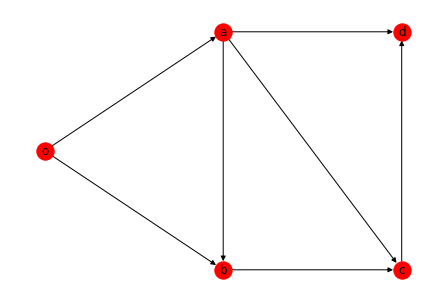

In [1198]:
Lambda = np.array([
    [0,3/4,3/8,0,0],
    [0,0,1/4,1/4,2/4],
    [0,0,0,1,0],
    [0,0,0,0,1],
    [0,0,0,0,0]
    ])

G = nx.from_numpy_matrix(Lambda,create_using=nx.DiGraph)
# relabel nodes
G = nx.relabel_nodes(G,{0:'o',1:'a',2:'b',3:'c',4:'d'})

#G.add_weighted_edges_from([("o'","o",1),('d',"d'",1)])

#G.add_edge("d","d")

# define plot positions
pos = {"o'":[-1,1],'o':[0,1],'a':[1,2],'b':[1,0],'d':[2,2],'c':[2,0],"d'":[3,2]}

# plot graph
nx.draw(G,pos,with_labels=True,node_color='red')
#nx.draw_networkx_edge_labels(G,pos,nx.get_edge_attributes(G,'weight'),font_color='red')

plt.savefig('Ex3_g.svg',dpi=180)

In [1171]:
w = np.sum(Lambda,axis=1)
w[4] = 2
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

In [1172]:
# set output rate
w[4] = 2

### Proportional Rate

#### Simulation with input rate 1

In [1173]:
# initial state
particles_per_node = [0,0,0,0,0]
# initial rates
rates = [particles_per_node[i]*w[i] for i in range(len(w))]

# all states in the simulation
states = []
# all times for each state in the simulation
times = []

# register inital state
states.append(particles_per_node.copy())

# register first time
current_time = 0
times.append(current_time)

while True:
    # register ticks of all poisson clocks
    transition_times = []
    
    # register input Poisson clock
    transition_times.append(-np.log(np.random.rand()))
    # register ticks of all other poisson clocks
    for i in range(len(w)):
        transition_times.append(-np.log(np.random.rand())/rates[i])
    # select the node whose clock ticks first
    transition_node = np.argmin(transition_times)
    # register its time
    current_time += transition_times[transition_node]
    # end the simulation if time is up
    if current_time > 60:
        break
    # if first tick is from input clock
    if transition_node == 0:
        # add particle to node o
        particles_per_node[0] += 1
    # if first tick is from output clock
    elif transition_node == 5:
        # remove particle from node d
        particles_per_node[4] -= 1
    else:
        # move particle according to the normalized weight matrix
        next_node = np.random.choice(len(w), p=P[transition_node-1,:])
        particles_per_node[transition_node-1] -= 1
        particles_per_node[next_node] += 1
    # register new state and time
    states.append(particles_per_node.copy())
    times.append(current_time)
    # update rates
    rates = [particles_per_node[ii]*w[ii] for ii in range(len(w))]

/tmp/ipykernel_166728/2688069988.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  transition_times.append(-np.log(np.random.rand())/rates[i])


In [1174]:
nodes_evolution = dict(zip(nodes,np.array(states).T))

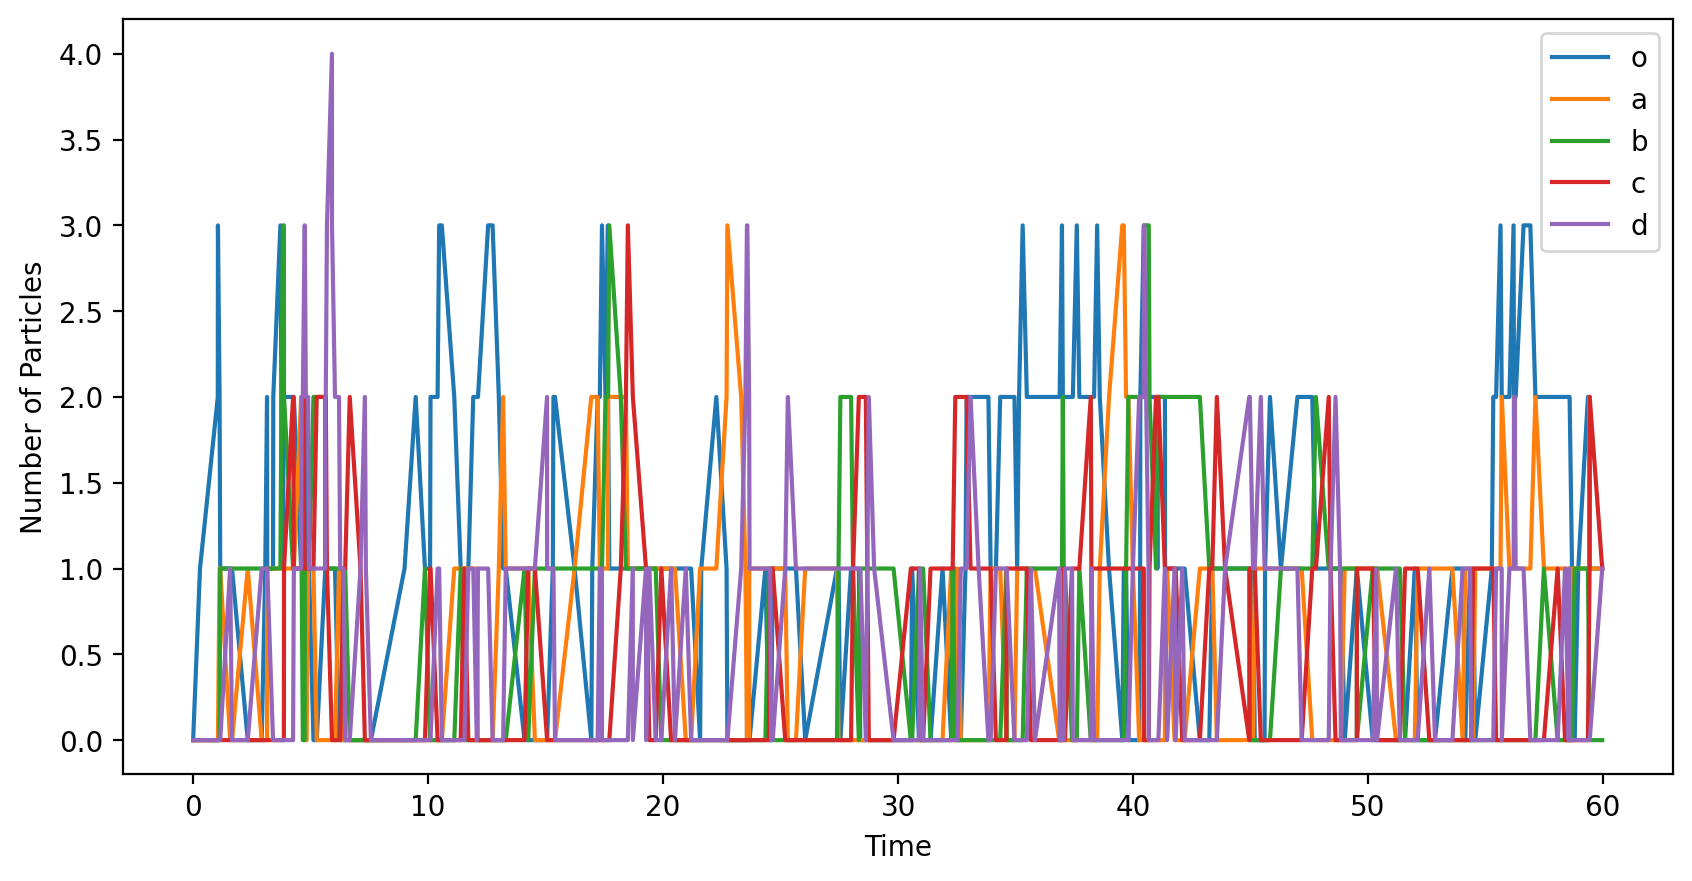

In [1175]:
plt.figure(dpi = 200, figsize=(10,5))
for l in nodes_evolution.keys():
    plt.plot(times, nodes_evolution[l], label = l)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.savefig('Ex3.svg',dpi=180)

#### Simulation with input rate 1000

In [1176]:
# initial state
particles_per_node = [0,0,0,0,0]
# initial rates
rates = [particles_per_node[i]*w[i] for i in range(len(w))]

# all states in the simulation
states = []
# all times for each state in the simulation
times = []

# register inital state
states.append(particles_per_node.copy())

# register first time
current_time = 0
times.append(current_time)

while True:
    # register ticks of all poisson clocks
    transition_times = []
    
    # register input Poisson clock
    transition_times.append(-np.log(np.random.rand())/1000)
    # register ticks of all other poisson clocks
    for i in range(len(w)):
        transition_times.append(-np.log(np.random.rand())/rates[i])
    # select the node whose clock ticks first
    transition_node = np.argmin(transition_times)
    # register its time
    current_time += transition_times[transition_node]
    # end the simulation if time is up
    if current_time > 60:
        break
    # if first tick is from input clock
    if transition_node == 0:
        # add particle to node o
        particles_per_node[0] += 1
    # if first tick is from output clock
    elif transition_node == 5:
        # remove particle from node d
        particles_per_node[4] -= 1
    else:
        # move particle according to the normalized weight matrix
        next_node = np.random.choice(len(w), p=P[transition_node-1,:])
        particles_per_node[transition_node-1] -= 1
        particles_per_node[next_node] += 1
    # register new state and time
    states.append(particles_per_node.copy())
    times.append(current_time)
    # update rates
    rates = [particles_per_node[ii]*w[ii] for ii in range(len(w))]

/tmp/ipykernel_166728/2605650534.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  transition_times.append(-np.log(np.random.rand())/rates[i])


In [1177]:
nodes_evolution = dict(zip(nodes,np.array(states).T))

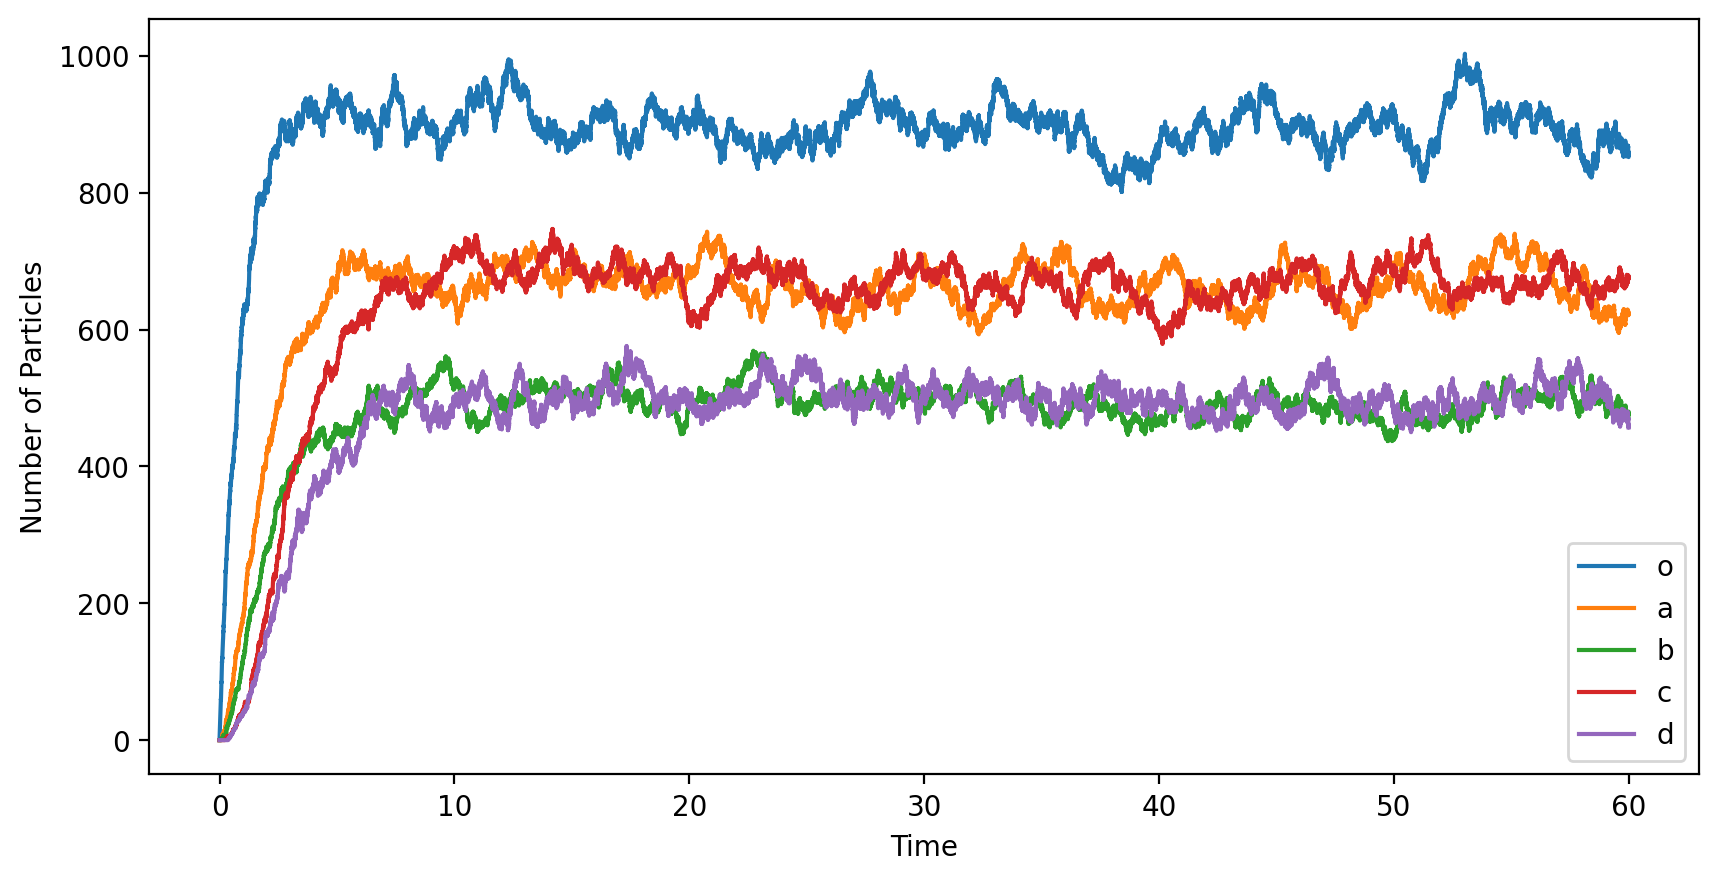

In [1178]:
plt.figure(dpi = 200, figsize=(10,5))
for l in nodes_evolution.keys():
    plt.plot(times, nodes_evolution[l], label = l)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.savefig('Ex3_1.svg',dpi=180)

### Fixed Rate

#### Input rate $\omega_0 - 0.2$

In [1191]:
# initial state
particles_per_node = [0,0,0,0,0]

# all states in the simulation
states = []
# all times for each state in the simulation
times = []

# register inital state
states.append(particles_per_node.copy())

# register first time
current_time = 0
times.append(current_time)

while True:
    # register ticks of all poisson clocks
    transition_times = []

    # register input Poisson clock
    transition_times.append(-np.log(np.random.rand())/(w[0]-0.2))
    # register ticks of all other poisson clocks
    for i in range(len(w)):
        if particles_per_node[i] > 0:
            transition_times.append(-np.log(np.random.rand())/w[i])
        else:
            transition_times.append(-np.log(np.random.rand())/0)
    # select the node whose clock ticks first
    transition_node = np.argmin(transition_times)
    # register its time
    current_time += transition_times[transition_node]
    
    # end the simulation if time is up
    if current_time > 60:
        break
    # if first tick is from input clock
    if transition_node == 0:
        # add particle to node o
        particles_per_node[0] += 1
    # if first tick is from output clock
    elif transition_node == 5:
        # remove particle from node d
        particles_per_node[4] -= 1
    else:
        # move particle according to the normalized weight matrix
        next_node = np.random.choice(len(w), p=P[transition_node-1,:])
        particles_per_node[transition_node-1] -= 1
        particles_per_node[next_node] += 1
    # register new state and time
    states.append(particles_per_node.copy())
    times.append(current_time)

/tmp/ipykernel_166728/2139518563.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  transition_times.append(-np.log(np.random.rand())/0)


In [1192]:
nodes_evolution = dict(zip(nodes,np.array(states).T))

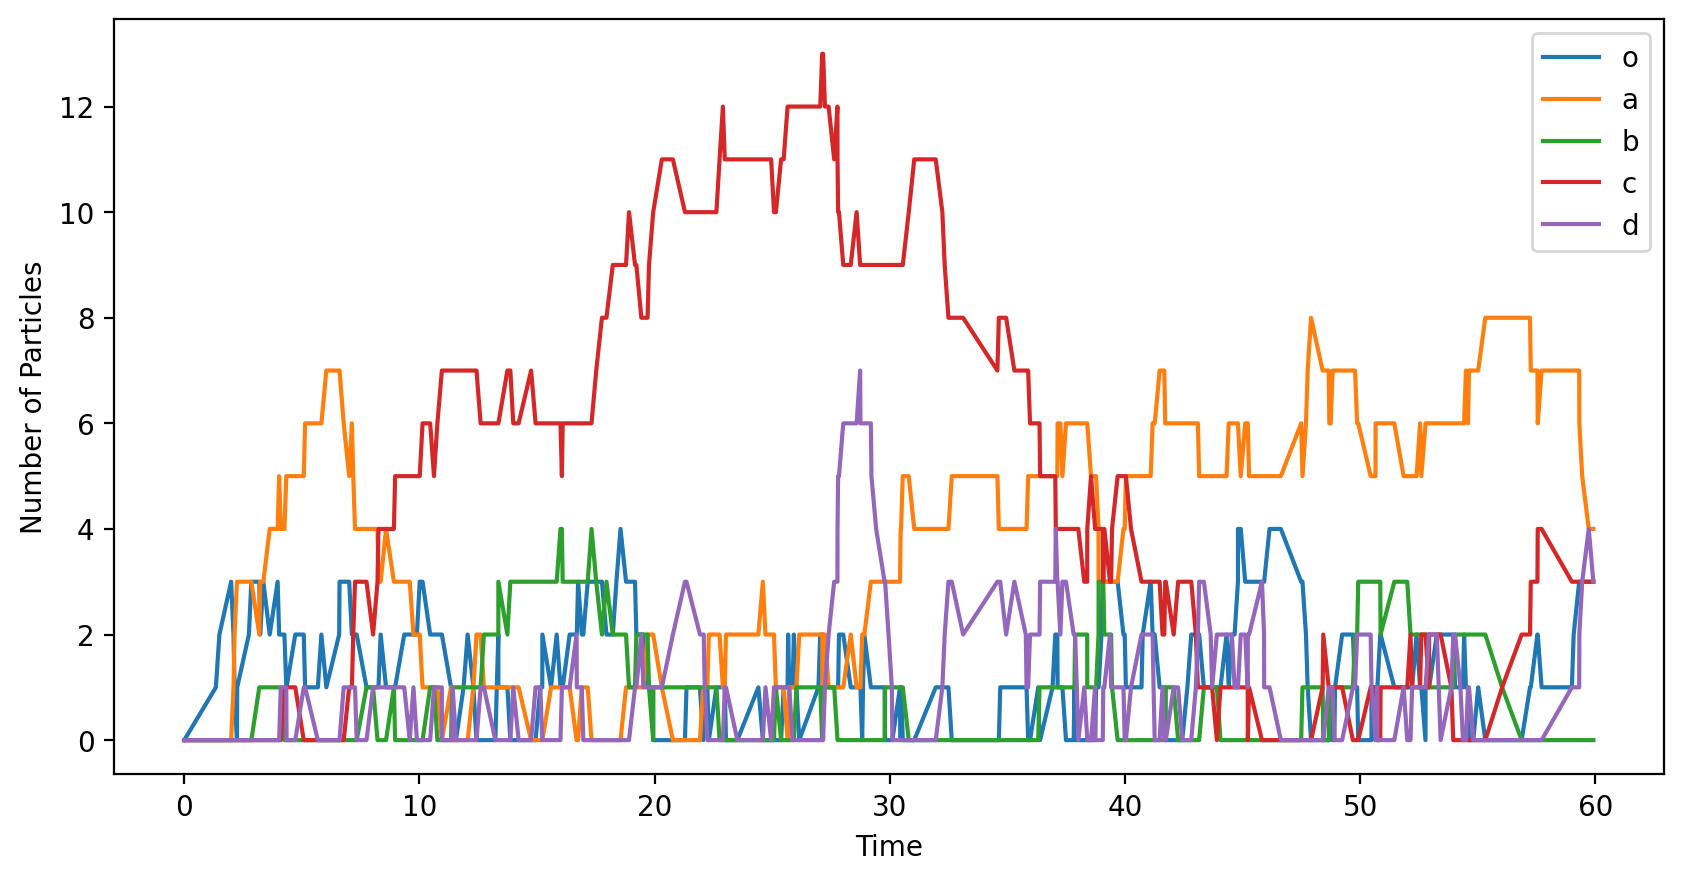

In [1193]:
plt.figure(dpi = 200, figsize=(10,5))
for l in nodes_evolution.keys():
    plt.plot(times, nodes_evolution[l], label = l)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.savefig('Ex3_2.svg',dpi=180)

#### Input rate $\omega_0 + 0.2$

In [1194]:
# initial state
particles_per_node = [0,0,0,0,0]

# all states in the simulation
states = []
# all times for each state in the simulation
times = []

# register inital state
states.append(particles_per_node.copy())

# register first time
current_time = 0
times.append(current_time)

while True:
    # register ticks of all poisson clocks
    transition_times = []

    # register input Poisson clock
    transition_times.append(-np.log(np.random.rand())/(w[0]+0.2))
    # register ticks of all other poisson clocks
    for i in range(len(w)):
        if particles_per_node[i] > 0:
            transition_times.append(-np.log(np.random.rand())/w[i])
        else:
            transition_times.append(-np.log(np.random.rand())/0)
    # select the node whose clock ticks first
    transition_node = np.argmin(transition_times)
    # register its time
    current_time += transition_times[transition_node]
    
    # end the simulation if time is up
    if current_time > 60:
        break
    # if first tick is from input clock
    if transition_node == 0:
        # add particle to node o
        particles_per_node[0] += 1
    # if first tick is from output clock
    elif transition_node == 5:
        # remove particle from node d
        particles_per_node[4] -= 1
    else:
        # move particle according to the normalized weight matrix
        next_node = np.random.choice(len(w), p=P[transition_node-1,:])
        particles_per_node[transition_node-1] -= 1
        particles_per_node[next_node] += 1
    # register new state and time
    states.append(particles_per_node.copy())
    times.append(current_time)

/tmp/ipykernel_166728/2711479664.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  transition_times.append(-np.log(np.random.rand())/0)


In [1195]:
nodes_evolution = dict(zip(nodes,np.array(states).T))

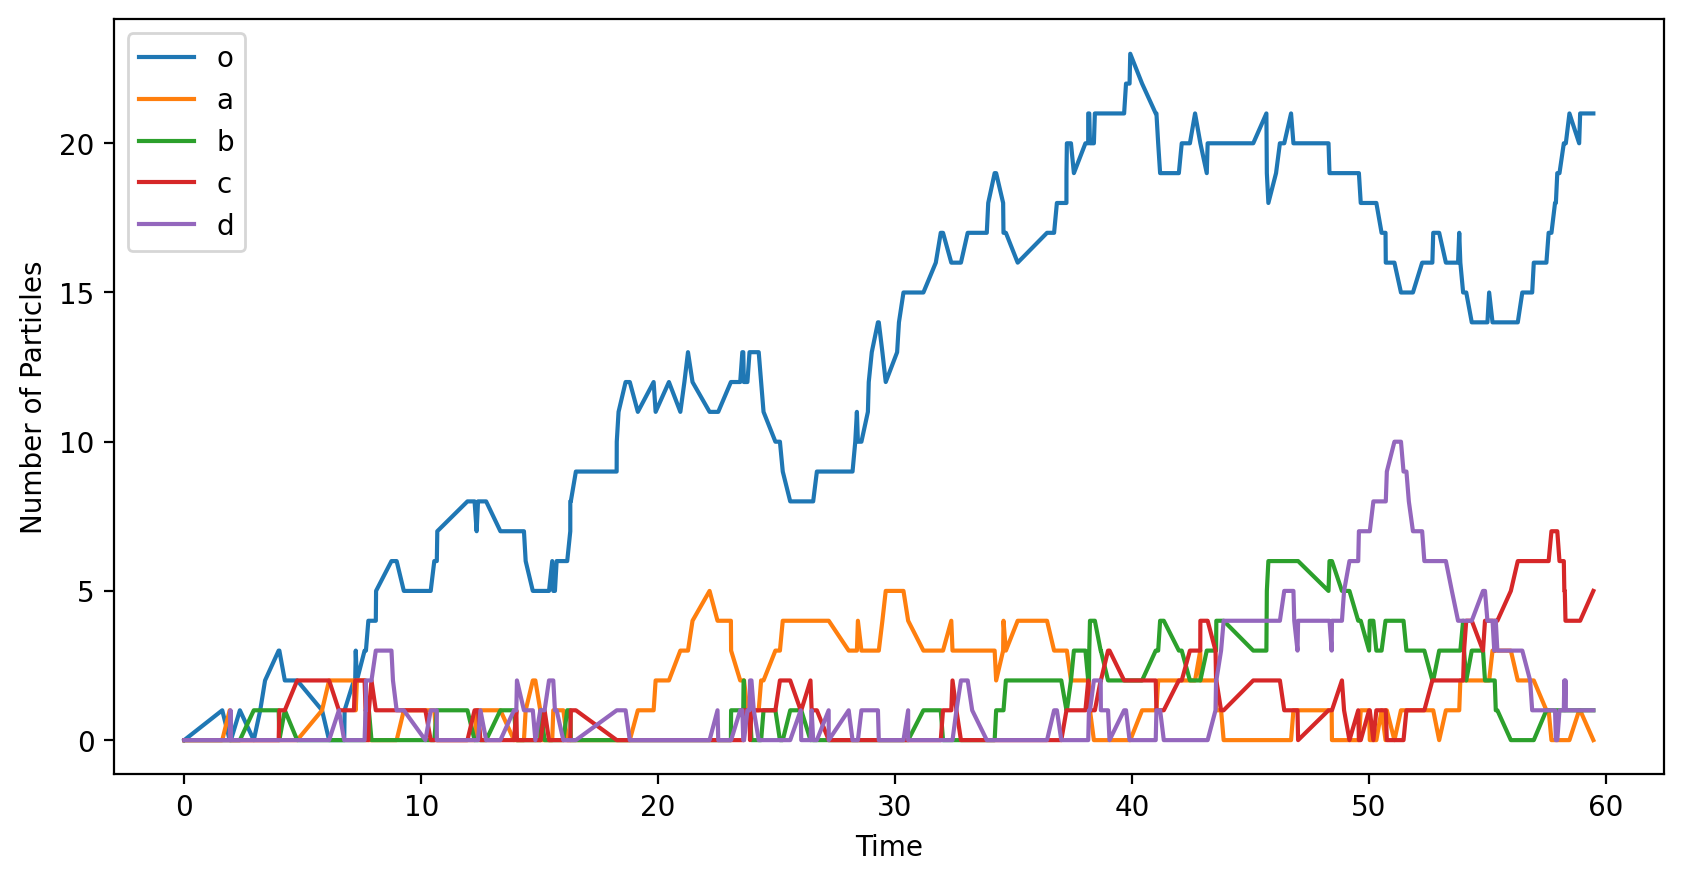

In [1196]:
plt.figure(dpi = 200, figsize=(10,5))
for l in nodes_evolution.keys():
    plt.plot(times, nodes_evolution[l], label = l)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.savefig('Ex3_3.svg',dpi=180)